### Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.
### data must be linearly separable.
## Types of logistic reg are as under
### 1) Binomial: there can be only two possible outcomes 0 or 1 and true or false
### 2) Multinomial: there can be 3 or more possible unordered types of outcomes, such as cat, dog, sheep etc
### 3) Ordinal: there cen be 3 or more prossible orderd outcomee, such as low, med, high 

### Linear line is not possible inthis can and we make use of sigmoid function --> 1/(1+e^-z)

### examples are spam, object detections etc

In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data
from sklearn.model_selection import train_test_split
# to import model
from sklearn.linear_model import LogisticRegression

In [31]:
# dataset
d_set=pd.read_csv("Social_Network_Ads.csv")
d_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Binary Logistic reg with single input data 

In [32]:
# as an exmaple we will make use of age and purchased column for our model 
# therefore we need to drop other columns
d_set.drop(columns=['User ID', 'Gender', 'EstimatedSalary'], axis=1, inplace=True)
d_set

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


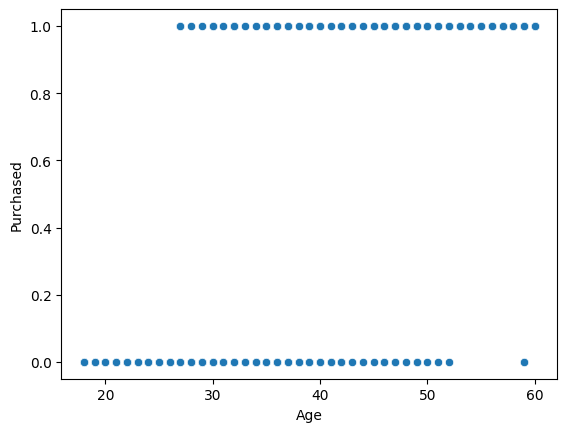

In [33]:
# visual graphically to make a decision of choosing a suitable model
sns.scatterplot(x=d_set['Age'], y=d_set['Purchased'], data=d_set)
plt.show()

### Result: from above graph it is clear that we can apply logistic reg

In [34]:
# separating input and output data for model
x=d_set[['Age']]
y=d_set['Purchased']

In [35]:
# split the data
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)

In [36]:
# train the model
lr=LogisticRegression()
# fit the model
lr.fit(xtrain, ytrain)

LogisticRegression()

In [37]:
# check the accuracy
lr.score(xtest, ytest)*100

82.5

In [38]:
# predict the sample data
# the sample age is 35 from the dataset and that person has not purchased anything
lr.predict([[35]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [39]:
# predictions
y_pred=lr.predict(x)

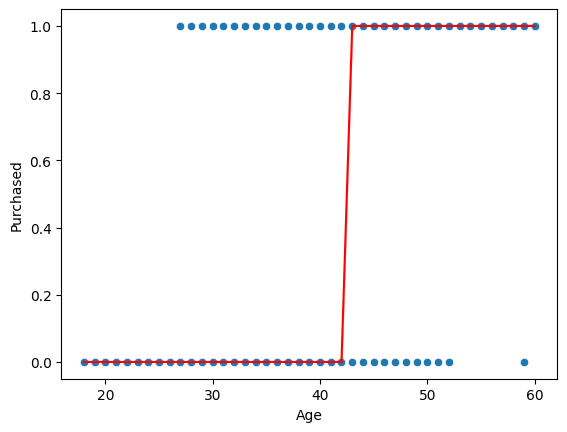

In [40]:
# now drawing prediction line on the scatter plot above
sns.scatterplot(x=d_set['Age'], y=d_set['Purchased'], data=d_set)
sns.lineplot(x=d_set['Age'], y=y_pred, data=d_set, color='r')
plt.show()

### result: in the above figure the red Z shaped line is the actual predicted line of the dataset

# Binary logistic reg with multiple input data

In [41]:
# dataset
d_set_2=pd.read_csv("placement.csv")
d_set_2.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [42]:
d_set_2.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


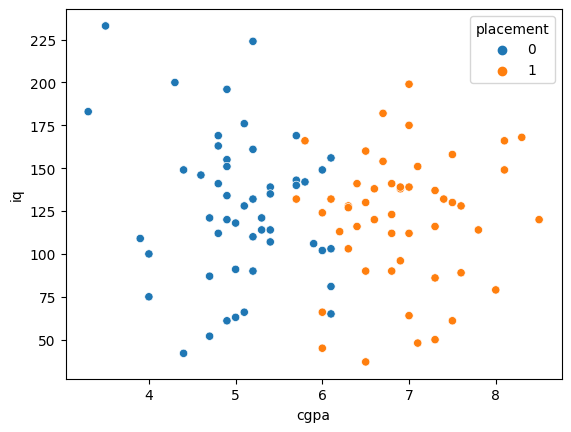

In [43]:
# graph to visual whether the data is linearly separable or not
sns.scatterplot(x=d_set_2['cgpa'], y=d_set_2['iq'], data=d_set_2, hue='placement')
plt.show()

### result: above graph shows the data points are linearly separable as both the data points are separate from each other and are not mixed

In [44]:
# separating the dependent and independent vars
X=d_set_2[['cgpa', 'iq']]
Y=d_set_2['placement']

In [45]:
# split the data
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

In [46]:
# model
lr_2=LogisticRegression()
lr_2.fit(X_train, Y_train)

LogisticRegression()

In [47]:
# Predict the sample points as cgpa 6.8 and score is 123 and studxent is placed means 1
lr_2.predict([[6.8, 123]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [48]:
# check the accuracy
lr_2.score(X_test, Y_test)*100

90.0

In [49]:
# now predictions
Y_pred=lr_2.predict(X)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


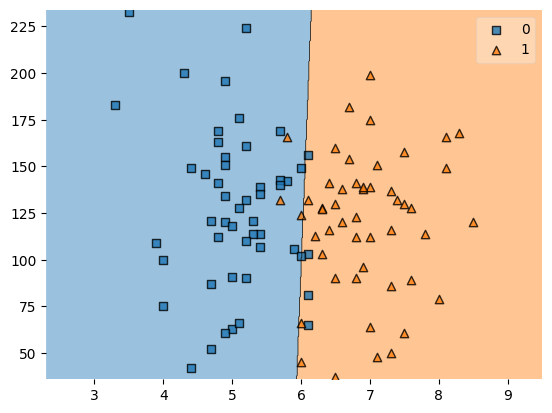

In [50]:
# visualise the predicted line on the above graph
# for this we need to install mlextend first in our system as follows
# open cmd and run --> pip install mlxtend
# importing
from mlxtend.plotting import plot_decision_regions # this will help us to plot a graphb with regions separating the data points

# this requires 3 parameters --> input(an array), output(an array) and model
plot_decision_regions(X.to_numpy(), Y.to_numpy(), clf=lr_2)
plt.show()

# binary logistic reg with polynomial inputs

In [51]:
# load data
d_set_3=pd.read_csv("polynomial.csv")
d_set_3.head(10)

,Feature1,Feature2,Label
0,0.548814,0.715189,1
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,1
4,0.963663,0.383442,1
5,0.791725,0.528895,1
6,0.568045,0.925597,1
7,0.071036,0.087129,0
8,0.020218,0.832620,1
9,0.778157,0.870012,1


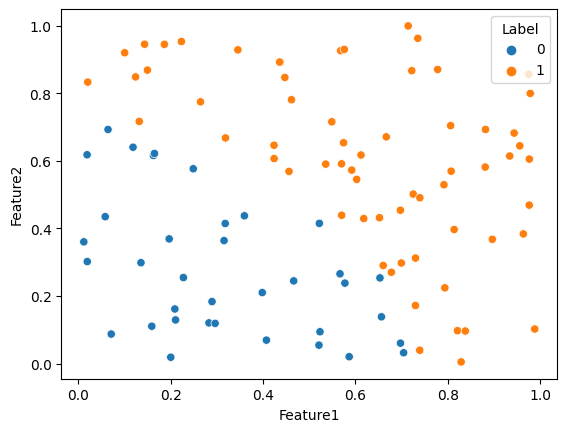

In [52]:
# graphical representation
sns.scatterplot(x=d_set_3['Feature1'], y=d_set_3['Feature2'], data=d_set_3, hue='Label')
plt.show()

### result: from the above graph it is clear that the data points are not that much mixed, but still we will apply polynomial reg for practice purpose.

In [73]:
# separate the input and output data
xx=d_set_3.iloc[:,:-1]
yy=d_set_3['Label']

In [74]:
# import library for polynomial features
from sklearn.preprocessing import PolynomialFeatures

# var
pf=PolynomialFeatures(degree=2)

# fit the data
pf.fit(xx)

# convert into dataframe
xx=pd.DataFrame(pf.transform(xx))

In [75]:
# spliting the data
xxtrain, xxtest, yytrain, yytest=train_test_split(xx, yy, test_size=0.2)

In [77]:
# model
plr=LogisticRegression()

# fit the data
plr.fit(xxtrain, yytrain)

LogisticRegression()

In [80]:
# accuracy score
plr.score(xxtest, yytest)*100

95.0